# Base EDA

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

['.bash_logout', '.profile', '.bashrc', '.ipython', '.local', '.config', '.cache', '.ipynb_checkpoints', 'data.csv', 'requirements.txt', 'README.md', '.gitattributes', 'eda.ipynb', 'conda-bld', '.conda', '.git', 'eda_base.ipynb']


In [5]:
# import libs
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from random import shuffle
from IPython.display import clear_output
from sklearn import metrics
from tqdm import tqdm
import time
import seaborn as sns
import os
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
lpmt = pd.read_csv('data.csv')

In [7]:
lpmt['is_DN'] = lpmt.isDN.apply(lambda x: 1 if x == True else 0)
event_dn_me = lpmt.groupby('event', as_index = False)['is_DN'].mean()
pmt_dn_me = lpmt.groupby('pmt_id', as_index = False)['is_DN'].mean()
event_dn_me['isDN_me'] = event_dn_me.is_DN.apply(lambda x: round(x,2))
pmt_dn_me['isDN_me'] = pmt_dn_me.is_DN.apply(lambda x: round(x,3))

(array([0]), <a list of 1 Text xticklabel objects>)

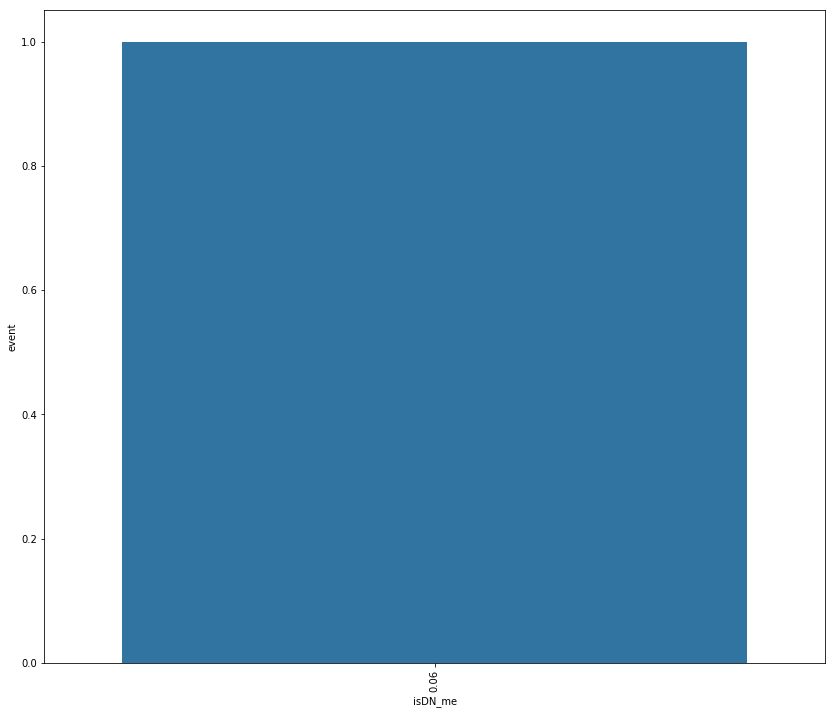

In [8]:
#Посомтрим распределение шума внутри каждого ивэнта
plt.figure(figsize=(14,12))
sns.barplot(x="isDN_me", y="event", data=event_dn_me.groupby('isDN_me', as_index = False)['event'].count())
plt.xticks(rotation=90)
#plt.xticks(x, labels, rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

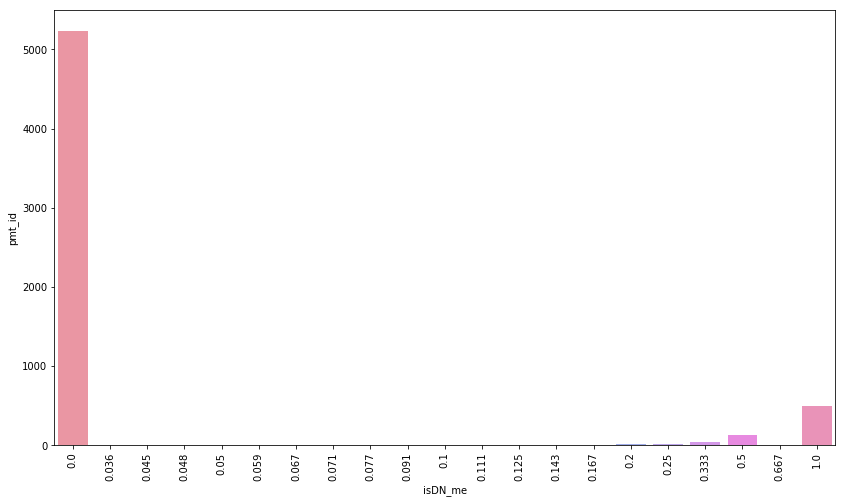

In [9]:
#Доля шума внутри каждого детектора
plt.figure(figsize=(14,8))
sns.barplot(x="isDN_me", y="pmt_id", data=pmt_dn_me.groupby('isDN_me', as_index = False)['pmt_id'].count())
plt.xticks(rotation=90)
#plt.xticks(x, labels, rotation='vertical')
# Судя по всему вероятность шума в детекторе равно 2 нормальным распределениям (:
# Разделим детекторы на 2 класса (из распределения 1 и из распределеня 2)

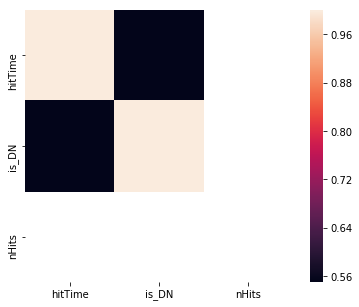

In [10]:
#Корреляция времени с шумом и количеством детектирований
plt.figure(figsize=(6,5))
sns.heatmap(lpmt[['hitTime','is_DN','nHits']].corr())